In [ ]:
# Honey Bee Hive model
# Justin Salamon

In [171]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [172]:
#INITIAL CONDITIONS
r = random.uniform(0, 2**31)
random.seed(r)
print(r)
# number of days simulation is run
days = 365
# Minimum Egg laying rate of queen
# queen should lay at least this much and at most twice as 
# much per day
# during winter months drops to 0
# during fall drops to half
egglaying = 1500.0
E_0 = egglaying
# Hive capacity - Called capacity but might just end up being some magic 
# number to get random starting points for populations.
hive_capacity = 49000.0

# initial population factor - multiplied by hive capacity to give us a starting point
# can be changed along with hive capacity.
init_factor = 0.1

# Initial Population
initial_pop = init_factor*hive_capacity

# Initial phase values
# each of these are multiplied by initial population to give a good setup of 
# population spread - these factors must add up 1.0
# values obtained from table 4

#initial eggs factor
init_eggs = 0.05
#initial Larvae factor
init_larvae = 0.10
#initial Pupae factor
init_pupae = 0.21
#initial hive bees factor
init_hivebees = 0.44
#initial forager bees factor
init_foragerbees = 0.20

# days spent as an egg
days_in_egg = 3
# days spent as a larva
days_as_larvae = 5
# days spent as a pupae
days_as_pupae = 12
# lifespan of hive bees
hive_bee_span = 21
# lifespan of forager bees
forager_bee_span= 14

# Egg survival rate
S_egg = 0.94
#Larvae survival rate
S_larvae = 0.917
# Pupae survival rate
S_pupae = 0.985
# Hive bee survival rate
S_hivebee = 0.985
# Forager bee survival rate
S_forager = 0.9

# egg consumption
C_egg = 0
# larvae consumption
C_larvae = 0.018
# pupae consumption
C_pupae = 0
# hive bee consumption
C_hive = 0.007
# forager bee consumption
C_forager = 0.007

# nutritional value of larvae, 0.025 g - experimentally found
nutrition_L = 0.025
# Minimum Forager food acquisition rate - nectar and pollen 
# can be influenced by seasonal changes or by illness.
# Initially constant rate
food_per_day = 0.1 # gram/(bee*day)
initial_food = 20000.0

400227648.41724086


In [173]:
# SETTING UP THE ARRAY FOR STORAGE

# Eggs per day
Eggs = np.zeros(days, dtype=float)
Eggs[0] = init_eggs*initial_pop
# eggs will last 3 days, so they belong in egg_life
# initially randomize the number of eggs in the these 3 slots to match 
# the initial egg amount
egg_life = np.zeros(days_in_egg, dtype=float)
for i in range(0, days_in_egg):
    egg_life[i] = Eggs[0]/days_in_egg

      
# Larvae per day
Larvae = np.zeros(days, dtype=float)
Larvae[0] = init_larvae*initial_pop
# where the current larvae are living, days_as_larvae slots
# randomize the amount in each to be a slice of the initial larvae
larvae_life = np.zeros(days_as_larvae, dtype=float)
for i in range(0, days_as_larvae):
    larvae_life[i] = Larvae[0]/days_as_larvae

# Pupae
Pupae = np.zeros(days, dtype=float)
Pupae[0] = init_pupae*initial_pop
# where the pupae live
# randomize the initial amount 
pupae_life = np.zeros(days_as_pupae, dtype=float)
for i in range(0, days_as_pupae):
    pupae_life[i] = Pupae[0]/days_as_pupae

# Hive Bees - to be divided into nursing and worker bees later
Hive_Bees = np.zeros(days, dtype=float)
Hive_Bees[0] = init_hivebees*initial_pop
# where the hive bees live
# randomize initial sum
hive_bee_life = np.zeros(hive_bee_span, dtype=float)
for i in range(0, hive_bee_span):
    hive_bee_life[i] = Hive_Bees[0]/hive_bee_span

# Forager Bees
Forager_Bees = np.zeros(days, dtype=float)
Forager_Bees[0] = init_foragerbees*initial_pop
#where the forager bees live
# randomize initial sum
forager_bee_life = np.zeros(forager_bee_span, dtype=float)
for i in range(0, forager_bee_span):
    forager_bee_life[i] = Forager_Bees[0]/forager_bee_span

# Food storage
Food = np.zeros(days, dtype=float)
Food[0] = initial_food

# Total Bees 
Total_Bees = np.zeros(days, dtype=float)
Total_Bees[0] = initial_pop

print(egg_life)
print(larvae_life)
print(pupae_life)
print(hive_bee_life)
print(forager_bee_life)
print("Hive Capacity:",hive_capacity)
print("Initial Population:", Total_Bees[0])
print("Initial Eggs:",Eggs[0])
print("Initial Larvae:",Larvae[0])
print("Initial Pupae:", Pupae[0])
print("Initial Hive Bees", Hive_Bees[0])
print("Initial Forager Bees:", Forager_Bees[0])
print("Initial Food:", Food[0])

[81.66666667 81.66666667 81.66666667]
[98. 98. 98. 98. 98.]
[85.75 85.75 85.75 85.75 85.75 85.75 85.75 85.75 85.75 85.75 85.75 85.75]
[102.66666667 102.66666667 102.66666667 102.66666667 102.66666667
 102.66666667 102.66666667 102.66666667 102.66666667 102.66666667
 102.66666667 102.66666667 102.66666667 102.66666667 102.66666667
 102.66666667 102.66666667 102.66666667 102.66666667 102.66666667
 102.66666667]
[70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 70.]
Hive Capacity: 49000.0
Initial Population: 4900.0
Initial Eggs: 245.0
Initial Larvae: 490.0
Initial Pupae: 1029.0
Initial Hive Bees 2156.0
Initial Forager Bees: 980.0
Initial Food: 20000.0


In [174]:
# FUNCTION TO BLANK OUT ALL PREVIOUS DATA FOR NEXT SIMULATION
def initialize():
    # Eggs per day
    Eggs[0] = init_eggs*initial_pop
    # eggs will last 3 days, so they belong in egg_life
    # initially randomize the number of eggs in the these 3 slots to match 
    # the initial egg amount
    for i in range(0, days_in_egg):
        egg_life[i] = Eggs[0]/days_in_egg


    # Larvae per day
    Larvae[0] = init_larvae*initial_pop
    # where the current larvae are living, days_as_larvae slots
    # randomize the amount in each to be a slice of the initial larvae
    for i in range(0, days_as_larvae):
        larvae_life[i] = Larvae[0]/days_as_larvae

    # Pupae
    Pupae[0] = init_pupae*initial_pop
    # where the pupae live
    # randomize the initial amount 
    for i in range(0, days_as_pupae):
        pupae_life[i] = Pupae[0]/days_as_pupae

    # Hive Bees - to be divided into nursing and worker bees later
    Hive_Bees[0] = init_hivebees*initial_pop
    # where the hive bees live
    # randomize initial sum
    for i in range(0, hive_bee_span):
        hive_bee_life[i] = Hive_Bees[0]/hive_bee_span

    # Forager Bees
    Forager_Bees[0] = init_foragerbees*initial_pop
    #where the forager bees live
    # randomize initial sum
    for i in range(0, forager_bee_span):
        forager_bee_life[i] = Forager_Bees[0]/forager_bee_span
    
    Total_Bees[0] = initial_pop
    initial_food = 20000.0

In [175]:
# FUNCTION TO CALCULATE IS A HIVE WITH CONSTANE FOOD GATHERING IS SELF SUFFICIENT
def self_sustaining(i: int):
    return (Forager_Bees[i]*food_per_day) >= (Larvae[i]*C_larvae + Hive_Bees[i]*C_hive + Forager_Bees[i]*C_forager)

print("Self Sustaining:", self_sustaining(0))

Self Sustaining: True


In [176]:
# FUNCTION TO CALCULATE THE RATIO OF HIVE BEES TO LARVAE
# Larvae survival rate can be lowered if there isn't enough Hive bees - later nurse bees
def Ratio_Hive_Larvae(i: int):
    return Hive_Bees[i]/Larvae[i]
# What a healthy ration should be
Healthy_Ratio_HL = 2
# alpha factor for reducing larvae survival based on ratio of hive bees to larvae
alpha = 0.25
# r is the ratio of the actual hive to larvae ratio and the healthy ratio
r = Ratio_Hive_Larvae(0)/Healthy_Ratio_HL
# Reduced Survival Rate of Larvae - occurs if the colony does not have enough hive bees to nurse the 
# larvae. In the case that the ratio of hive bees to larvae dips below the healthy ratio,
# then use this reduced survival rate, which will be less than 1.
S_reduced_larvae = S_larvae*(r**alpha)


print("Ratio of Hive Bees to Larvae:", Ratio_Hive_Larvae(0))
print("Healthy Ratio:", Healthy_Ratio_HL)
print("Reduced Survival Rate:", S_reduced_larvae)

Ratio of Hive Bees to Larvae: 4.4
Healthy Ratio: 2
Reduced Survival Rate: 1.1167989729235415


In [177]:
# FUNCTION TO CALCULATE HIVE BEE TO FORAGER RATIO
# hive bees can start transitioning to forager potentiallty earlier because of this.
def Ratio_Hive_Forager(i: int):
    return Hive_Bees[i]/Forager_Bees[i]
# This can add or reduce days spent as a hive bee
Healthy_Ratio_HF = 2.3

In [178]:
# FUNCTION TO RUN ON ARRAYS DURING SIMULATION
# SHIFTS ALL THE i DAY OLD BEES TO THE i+1th DAY OLD CATEGORY SPACE
def Right_Shift(arr, arg):
    for i in range(len(arr)-1, 0, -1):
        arr[i] = arr[i-1]*arg

In [179]:
# FUNCTION THAT IS CALLED WHEN THERE IS NOT ENOUGH FOOD FOR THE BEES TO EAT
# LARVAE IS CANNIBALIZED HERE.
def Cannibalism(i: int):
        #print(Food[i], i, larvae_life[0])
        needed = math.ceil(Food[i]*-1)
        #print("Needed:", needed)
        cannibalized = needed/nutrition_L
        #print("Cannibalized:", cannibalized)
        index = 0
        # now eat larvae from every cell of larvae_life
        while(index < days_as_larvae and cannibalized > 0):
            if(cannibalized < larvae_life[index]):
                larvae_life[index] -= cannibalized
            else:
                cannibalized -= larvae_life[index]
                larvae_life[index] = 0
                index += 1
                
        Food[i] = 0
        #print(larvae_life)
        Larvae[i] = sum(larvae_life)
        
        # if cannibalized is still greater then 0, then survival rates need to be decreased
        if(cannibalized > 0):
            return True
        return False


In [180]:
# FIRST SIMULATION WITH CONSTANT EGG LAYING AND NOTHING ELSE
# no concerns over food 
# Eggs -> Larvae -> Pupae -> Hive Bees -> Forager Bees
initialize()
for i in range(1, days):
    
    # Forager Bees go First
    # Shift Forager Bees over
    Right_Shift(forager_bee_life, S_forager)
    # take hive bees from end of hive bee life and put into forager bee life 0
    forager_bee_life[0] = hive_bee_life[hive_bee_span-1]
    
    # Hive Bees
    Right_Shift(hive_bee_life, S_hivebee)
    # take pupae transitioning to hive bee
    hive_bee_life[0] = pupae_life[days_as_pupae-1]
    
    # Pupae
    Right_Shift(pupae_life, S_pupae)
    # take larvae
    pupae_life[0] = larvae_life[days_as_larvae-1]
    
    # Larvae
    Right_Shift(larvae_life, S_larvae)
    # take eggs
    larvae_life[0] = egg_life[days_in_egg-1]
    
    # Eggs
    Right_Shift(egg_life, S_egg)
    # queen lays eggs into egg_life[0]
    egg_life[0] = E_0
    
    # Count the population for each cycle on day i
    Forager_Bees[i] = sum(forager_bee_life)
    Hive_Bees[i] = sum(hive_bee_life)
    Pupae[i] = sum(pupae_life)
    Larvae[i] = sum(larvae_life)
    Eggs[i] = sum(egg_life)
    
    Total_Bees[i] = Forager_Bees[i] + Hive_Bees[i] + Pupae[i] + Larvae[i] + Eggs[i]
    Total_Bees[i] = math.floor(Total_Bees[i])
    
#print(egg_life)
#print(larvae_life)
#print(pupae_life)
#print(hive_bee_life)
#print(forager_bee_life)
#print(Total_Bees)

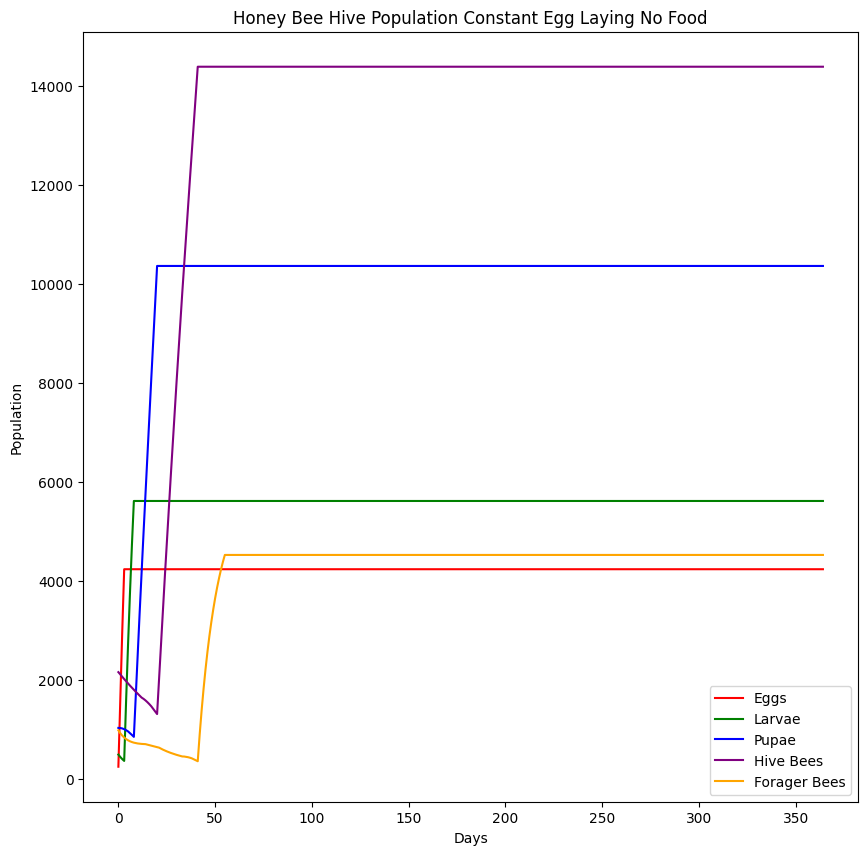

In [181]:
# plot population vs days
#print(Eggs)
#print(Larvae)
#print(Pupae)
#print(Hive_Bees)
#print(Forager_Bees)
plt.figure(figsize=(10,10))
plt.title("Honey Bee Hive Population Constant Egg Laying No Food", fontsize="large")
plt.xlabel("Days",fontsize='medium')
plt.ylabel("Population", fontsize='medium')

plt.plot(Eggs,color='red',label="Eggs")
plt.plot(Larvae,color='green',label='Larvae')
plt.plot(Pupae,color='blue',label='Pupae')
plt.plot(Hive_Bees,color='purple',label='Hive Bees')
plt.plot(Forager_Bees,color='orange',label='Forager Bees')

plt.legend()
plt.show()

In [182]:
# SECOND SIMULATION WITH CONSTAANT FOOD GATHERING AND CONSTANT EGG LAYING RATE
initialize()
laying = True
Food = np.zeros(days, dtype = float)
Food[0] = 2000.0
print(Food[0])
Hive_Survival = np.zeros(days, dtype = float)
Hive_Survival[0] = S_hivebee
Forager_Survival = np.zeros(days, dtype = float)
Forager_Survival[0] = S_forager

for i in range(1, days):
    # Forager Bees go First
    # Shift Forager Bees over
    Right_Shift(forager_bee_life, S_forager)
    # take hive bees from end of hive bee life and put into forager bee life 0
    forager_bee_life[0] = hive_bee_life[hive_bee_span-1]
    
    # Hive Bees
    Right_Shift(hive_bee_life, S_hivebee)
    # take pupae transitioning to hive bee
    hive_bee_life[0] = pupae_life[days_as_pupae-1]
    
    # Pupae
    Right_Shift(pupae_life, S_pupae)
    # take larvae
    pupae_life[0] = larvae_life[days_as_larvae-1]
    
    # Larvae
    Right_Shift(larvae_life, S_larvae)
    # take eggs
    larvae_life[0] = egg_life[days_in_egg-1]
    
    # Eggs
    Right_Shift(egg_life, S_egg)
    # queen lays eggs into egg_life[0]
    if(laying):
        egg_life[0] = E_0
    else:
        egg_life[0] = 0
    
    # Count the population for each cycle on day i
    Forager_Bees[i] = sum(forager_bee_life)
    Hive_Bees[i] = sum(hive_bee_life)
    Pupae[i] = sum(pupae_life)
    Larvae[i] = sum(larvae_life)
    Eggs[i] = sum(egg_life)
    
    Total_Bees[i] = Forager_Bees[i] + Hive_Bees[i] + Pupae[i] + Larvae[i] + Eggs[i]
    Total_Bees[i] = math.floor(Total_Bees[i])
    
    Food[i] = (Food[i-1] - Larvae[i]*C_larvae - Hive_Bees[i]*C_hive - Forager_Bees[i]*C_forager)
    #if we reach  negative food, then there needs to be cannibalism of the larvae
    # each larvae is assigned to be 0.025 g of food. So the bees will cannibalize 
    # enough larvae to reach at least 0 food, or all larvae if there is not enough,
    # larvae will be eaten from the first larvae_life cell, then 2nd, onward.
    if(Food[i] < 0):
        if(Cannibalism(i)):
            print("C", i)
            # Hive bee survival rate
            S_hivebee = 0.67
            # Forager bee survival rate
            S_forager = 0.85
    else:
        # Hive bee survival rate
        S_hivebee = 0.985
        # Forager bee survival rate
        S_forager = 0.955
    Food[i] += food_per_day*Forager_Bees[i]  
    Hive_Survival[i] = S_hivebee
    Forager_Survival[i] = S_forager
    # Queen Dies
    if(Forager_Bees[i] == 0. and Hive_Bees[i] == 0. and Pupae[i] == 0. and Larvae[i] == 0.):
        laying = False

#print(Food)

2000.0
C 41
C 42


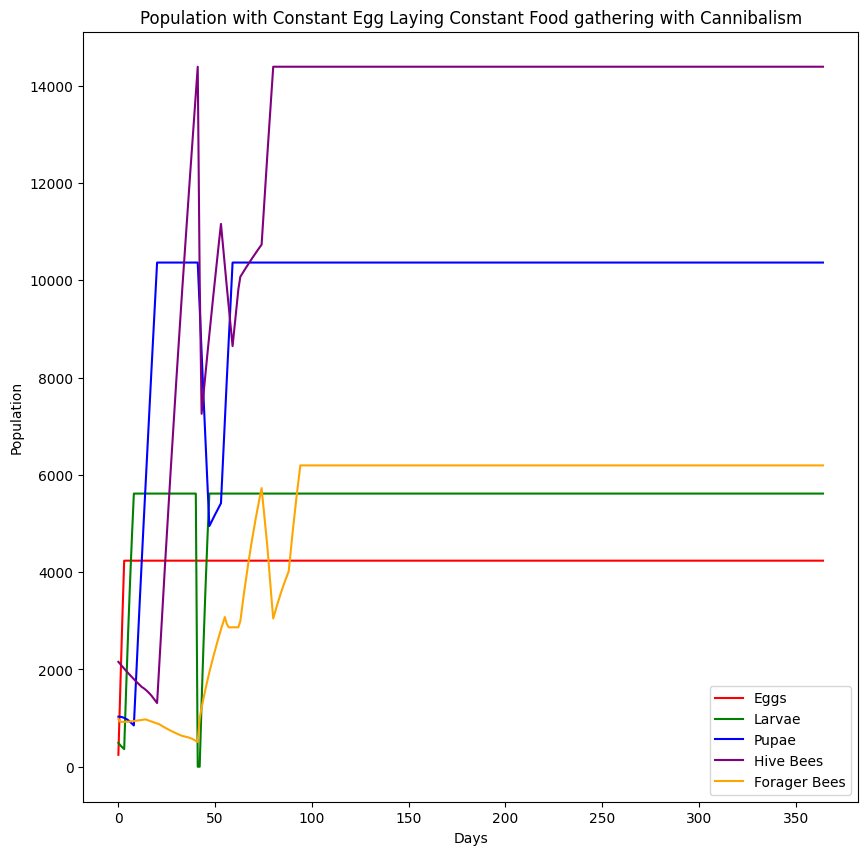

In [183]:
# plot population vs days
#print(Eggs)
#print(Larvae)
#print(Pupae)
#print(Hive_Bees)
#print(Forager_Bees)
plt.figure(figsize=(10,10))
plt.title("Population with Constant Egg Laying Constant Food gathering with Cannibalism", fontsize="large")
plt.xlabel("Days",fontsize='medium')
plt.ylabel("Population", fontsize='medium')

plt.plot(Eggs,color='red',label="Eggs")
plt.plot(Larvae,color='green',label='Larvae')
plt.plot(Pupae,color='blue',label='Pupae')
plt.plot(Hive_Bees,color='purple',label='Hive Bees')
plt.plot(Forager_Bees,color='orange',label='Forager Bees')

plt.legend()
plt.show()

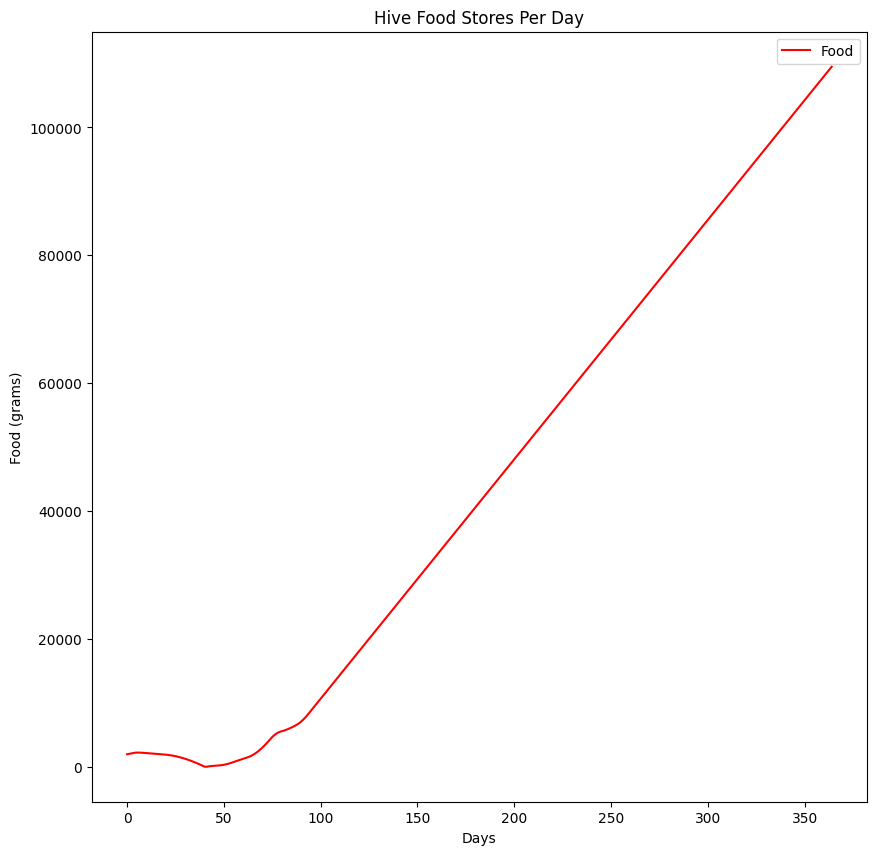

In [184]:
# plot population vs days
#print(Eggs)
#print(Larvae)
#print(Pupae)
#print(Hive_Bees)
#print(Forager_Bees)
plt.figure(figsize=(10,10))
plt.title("Hive Food Stores Per Day", fontsize="large")
plt.xlabel("Days",fontsize='medium')
plt.ylabel("Food (grams)", fontsize='medium')

plt.plot(Food,color='red',label="Food")

plt.legend()
plt.show()

In [185]:
# SIMULATION WITH RANDOM INITIAL FOOD CONSTANT EGG LAYING AND FOOD GATHERING
initialize()
#interesting 4952.90548630054 init pop
# 3330.8106843345927
laying = True
Food = np.zeros(days, dtype = float)
initial_food = random.uniform(1000,15000)
print(initial_food)
Food[0] = 3330.8106843345927
Hive_Survival = np.zeros(days, dtype = float)
Hive_Survival[0] = S_hivebee
Forager_Survival = np.zeros(days, dtype = float)
Forager_Survival[0] = S_forager

for i in range(1, days):
    # Forager Bees go First
    # Shift Forager Bees over
    Right_Shift(forager_bee_life, S_forager)
    # take hive bees from end of hive bee life and put into forager bee life 0
    forager_bee_life[0] = hive_bee_life[hive_bee_span-1]
    
    # Hive Bees
    Right_Shift(hive_bee_life, S_hivebee)
    # take pupae transitioning to hive bee
    hive_bee_life[0] = pupae_life[days_as_pupae-1]
    
    # Pupae
    Right_Shift(pupae_life, S_pupae)
    # take larvae
    pupae_life[0] = larvae_life[days_as_larvae-1]
    
    # Larvae
    Right_Shift(larvae_life, S_larvae)
    # take eggs
    larvae_life[0] = egg_life[days_in_egg-1]
    
    # Eggs
    Right_Shift(egg_life, S_egg)
    # queen lays eggs into egg_life[0]
    if(laying):
        egg_life[0] = E_0
    else:
        egg_life[0] = 0
    
    # Count the population for each cycle on day i
    Forager_Bees[i] = sum(forager_bee_life)
    Hive_Bees[i] = sum(hive_bee_life)
    Pupae[i] = sum(pupae_life)
    Larvae[i] = sum(larvae_life)
    Eggs[i] = sum(egg_life)
    
    Total_Bees[i] = Forager_Bees[i] + Hive_Bees[i] + Pupae[i] + Larvae[i] + Eggs[i]
    Total_Bees[i] = math.floor(Total_Bees[i])
    
    Food[i] = (Food[i-1] - Larvae[i]*C_larvae - Hive_Bees[i]*C_hive - Forager_Bees[i]*C_forager)
    #if we reach  negative food, then there needs to be cannibalism of the larvae
    # each larvae is assigned to be 0.025 g of food. So the bees will cannibalize 
    # enough larvae to reach at least 0 food, or all larvae if there is not enough,
    # larvae will be eaten from the first larvae_life cell, then 2nd, onward.
    if(Food[i] < 0):
        if(Cannibalism(i)):
            # Hive bee survival rate
            S_hivebee = 0.67
            # Forager bee survival rate
            S_forager = 0.85
    elif(Food[i] > 0 and Forager_Bees[i] > 0. and Hive_Bees[i] > 0.):
        # Hive bee survival rate
        S_hivebee = 0.985
        # Forager bee survival rate
        S_forager = 0.955
        
    Hive_Survival[i] = S_hivebee
    Forager_Survival[i] = S_forager
    
    food_per_day = random.uniform(0.01, 0.1)
    if(Forager_Bees[i] > 0.):
        Food[i] = Food[i] + food_per_day*Forager_Bees[i]
    else:
        Food[i] = 0.
        
    # Queen dies
    if(Forager_Bees[i] == 0. and Hive_Bees[i] == 0. and Pupae[i] == 0. and Larvae[i] == 0.):
        laying = False
        Food[i] = Food[i-1]
    
#print(Food)

5003.2236379291535


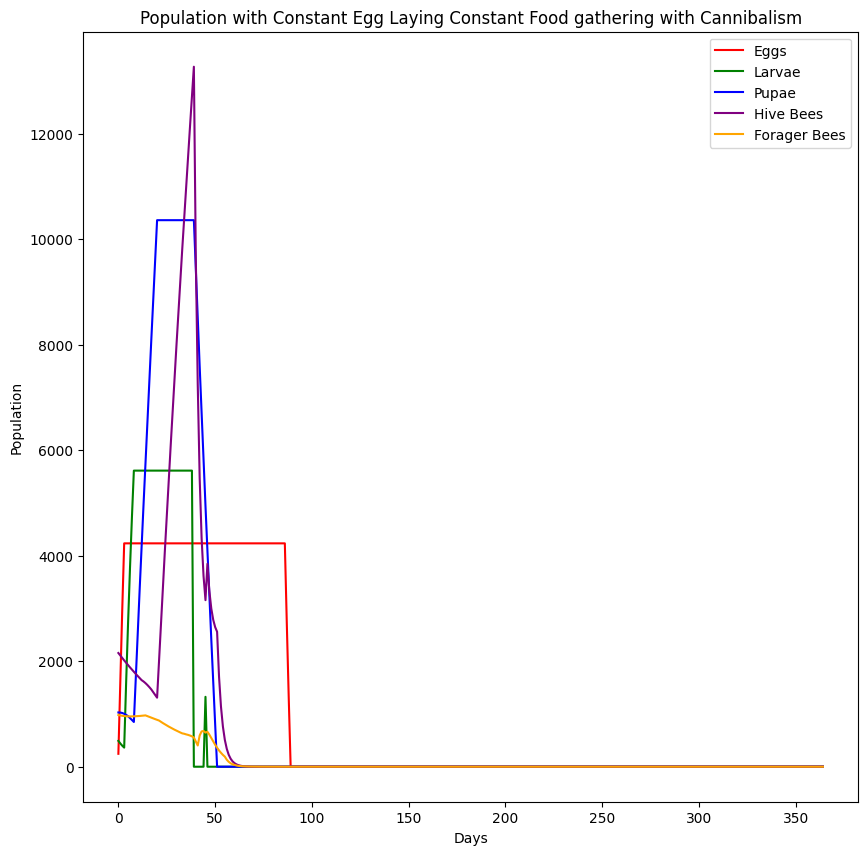

In [186]:
# plot population vs days
#print(Eggs)
#print(Larvae)
#print(Pupae)
#print(Hive_Bees)
#print(Forager_Bees)
plt.figure(figsize=(10,10))
plt.title("Population with Constant Egg Laying Constant Food gathering with Cannibalism", fontsize="large")
plt.xlabel("Days",fontsize='medium')
plt.ylabel("Population", fontsize='medium')

plt.plot(Eggs,color='red',label="Eggs")
plt.plot(Larvae,color='green',label='Larvae')
plt.plot(Pupae,color='blue',label='Pupae')
plt.plot(Hive_Bees,color='purple',label='Hive Bees')
plt.plot(Forager_Bees,color='orange',label='Forager Bees')

plt.legend()
plt.show()

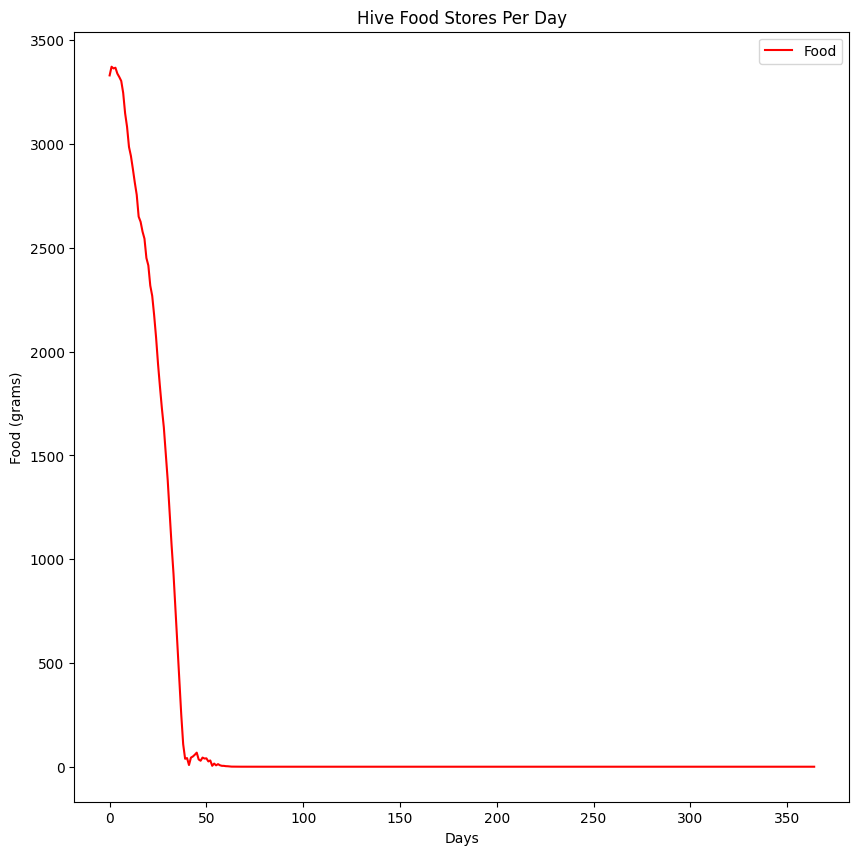

In [187]:
# plot population vs days
#print(Eggs)
#print(Larvae)
#print(Pupae)
#print(Hive_Bees)
#print(Forager_Bees)
plt.figure(figsize=(10,10))
plt.title("Hive Food Stores Per Day", fontsize="large")
plt.xlabel("Days",fontsize='medium')
plt.ylabel("Food (grams)", fontsize='medium')

plt.plot(Food,color='red',label="Food")

plt.legend()
plt.show()

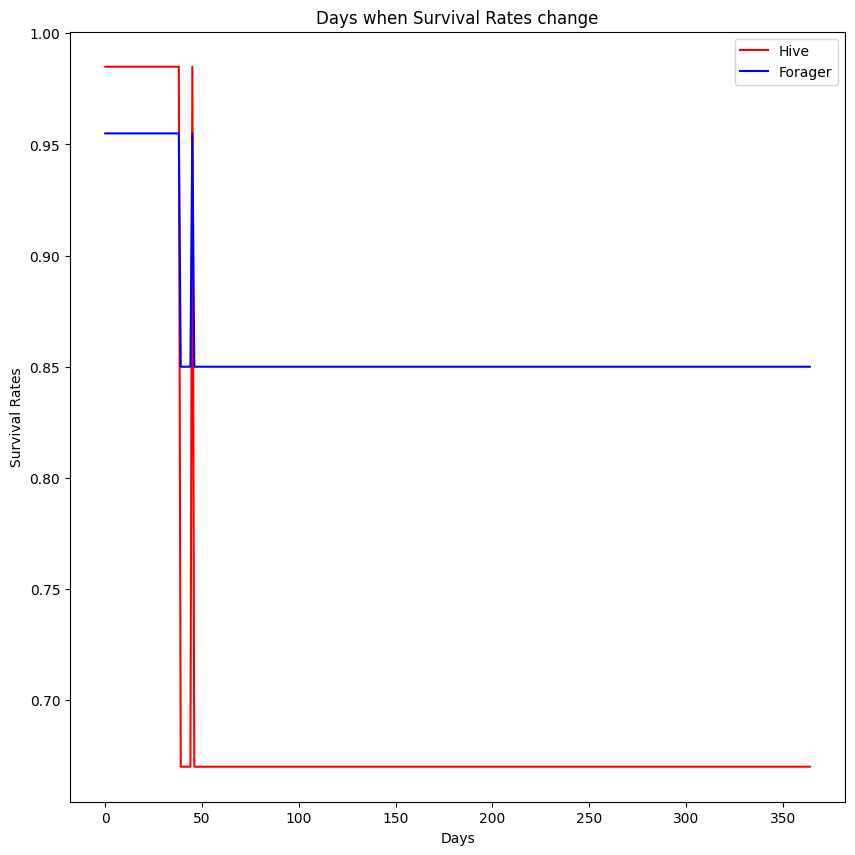

In [188]:
plt.figure(figsize=(10,10))
plt.title("Days when Survival Rates change", fontsize="large")
plt.xlabel("Days",fontsize='medium')
plt.ylabel("Survival Rates", fontsize='medium')

plt.plot(Hive_Survival,color='red',label="Hive")
plt.plot(Forager_Survival, color='blue', label='Forager')
plt.legend()
plt.show()

In [189]:
# RUNNING SIMULATION WITH RANDOM EGG LAYING, RANDOM INITIAL FOOD AND RANDOM FOOD PER DAY
#3378.27970905573 
# 45000

#10025.796322563443
# 70000

#initial food: 4393.569376422411
#initial pop: 7000.0

#initial food: 3492.066611023358
# iniutial pop: 7000.0
initialize()
laying = True
Food = np.zeros(days, dtype = float)
initial_food = random.uniform(1000,15000)
print("initial food:", initial_food)
print("initial pop:", initial_pop)
Food[0] = initial_food
Hive_Survival = np.zeros(days, dtype = float)
Hive_Survival[0] = S_hivebee
Forager_Survival = np.zeros(days, dtype = float)
Forager_Survival[0] = S_forager

for i in range(1, days):
    # Forager Bees go First
    # Shift Forager Bees over
    Right_Shift(forager_bee_life, S_forager)
    # take hive bees from end of hive bee life and put into forager bee life 0
    forager_bee_life[0] = hive_bee_life[hive_bee_span-1]
    
    # Hive Bees
    Right_Shift(hive_bee_life, S_hivebee)
    # take pupae transitioning to hive bee
    hive_bee_life[0] = pupae_life[days_as_pupae-1]
    
    # Pupae
    Right_Shift(pupae_life, S_pupae)
    # take larvae
    pupae_life[0] = larvae_life[days_as_larvae-1]
    
    # Larvae
    Right_Shift(larvae_life, S_larvae)
    # take eggs
    larvae_life[0] = egg_life[days_in_egg-1]
    
    # Eggs
    Right_Shift(egg_life, S_egg)
    # queen lays eggs into egg_life[0]
    if(laying):
        egg_life[0] = random.uniform(500,2000)
    else:
        egg_life[0] = 0
    
    # Count the population for each cycle on day i
    Forager_Bees[i] = sum(forager_bee_life)
    Hive_Bees[i] = sum(hive_bee_life)
    Pupae[i] = sum(pupae_life)
    Larvae[i] = sum(larvae_life)
    Eggs[i] = sum(egg_life)
    
    Total_Bees[i] = Forager_Bees[i] + Hive_Bees[i] + Pupae[i] + Larvae[i] + Eggs[i]
    Total_Bees[i] = math.floor(Total_Bees[i])
    
    Food[i] = (Food[i-1] - Larvae[i]*C_larvae - Hive_Bees[i]*C_hive - Forager_Bees[i]*C_forager)
    #if we reach  negative food, then there needs to be cannibalism of the larvae
    # each larvae is assigned to be 0.025 g of food. So the bees will cannibalize 
    # enough larvae to reach at least 0 food, or all larvae if there is not enough,
    # larvae will be eaten from the first larvae_life cell, then 2nd, onward.
    if(Food[i] < 0):
        # if cannibalism occurs, then the hivebee and forager bees have reduced survival rates
        # in addition, part of the hivebees are forced into becoming foragers to try and recover food
        # hivebees 2 and 3 days away become foragers now
        if(Cannibalism(i)):
            # Hive bee survival rate
            S_hivebee = 0.80
            # Forager bee survival rate
            S_forager = 0.85
            forager_bee_life[0] += hive_bee_life[hive_bee_span-1]
            forager_bee_life[0] += hive_bee_life[hive_bee_span-2]
            hive_bee_life[hive_bee_span-1] = 0
            hive_bee_life[hive_bee_span-2] = 0
            Hive_Bees[i] = sum(hive_bee_life)
    elif(Food[i] > 0 and Forager_Bees[i] > 0. and Hive_Bees[i] > 0.):
        # Hive bee survival rate
        S_hivebee = 0.985
        # Forager bee survival rate
        S_forager = 0.955
        
    Hive_Survival[i] = S_hivebee
    Forager_Survival[i] = S_forager
    
    food_today = 0.
    for j in range(0, int(Forager_Bees[i])):
        food_today += random.uniform(0.,0.1)
    #food_per_day = random.uniform(0.01, 0.1)
    #if(Forager_Bees[i] > 0.):
        #Food[i] = Food[i] + food_per_day*Forager_Bees[i]
    #else:
        #Food[i] = 0.
    # Queen dies
    Food[i] += food_today
    if(Forager_Bees[i] == 0. and Hive_Bees[i] == 0. and Pupae[i] == 0. and Larvae[i] == 0.):
        laying = False
        Food[i] = Food[i-1]
        #print("Dead")
#print(Food)

initial food: 11962.118810893779
initial pop: 4900.0


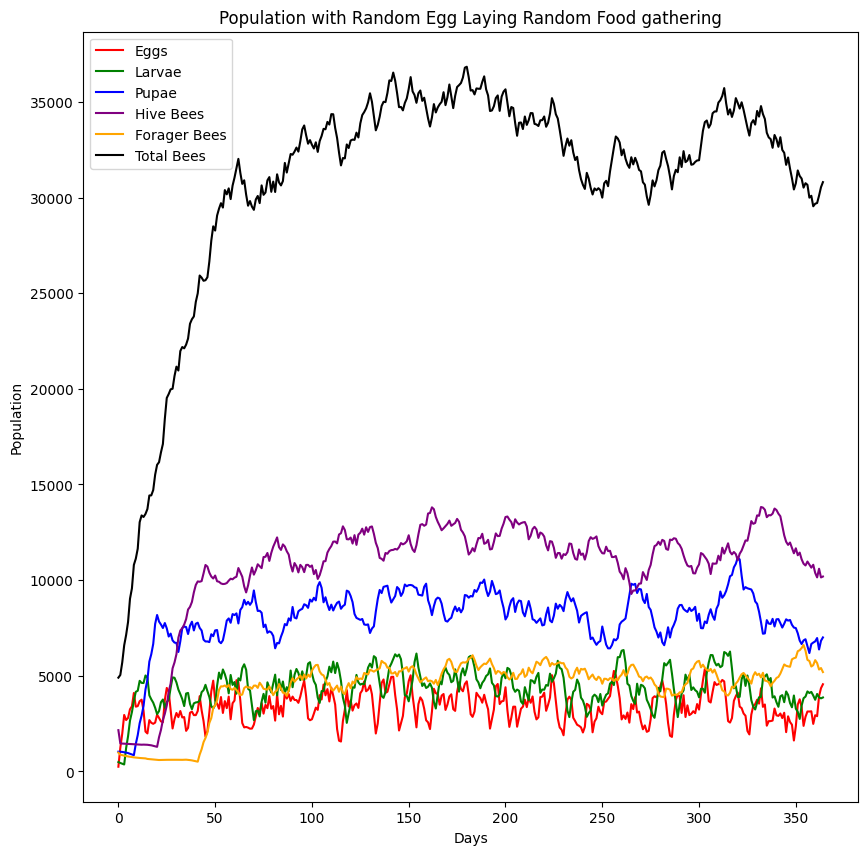

In [190]:
# plot population vs days
#print(Eggs)
#print(Larvae)
#print(Pupae)
#print(Hive_Bees)
#print(Forager_Bees)
plt.figure(figsize=(10,10))
plt.title("Population with Random Egg Laying Random Food gathering", fontsize="large")
plt.xlabel("Days",fontsize='medium')
plt.ylabel("Population", fontsize='medium')

plt.plot(Eggs,color='red',label="Eggs")
plt.plot(Larvae,color='green',label='Larvae')
plt.plot(Pupae,color='blue',label='Pupae')
plt.plot(Hive_Bees,color='purple',label='Hive Bees')
plt.plot(Forager_Bees,color='orange',label='Forager Bees')
plt.plot(Total_Bees, color='black', label='Total Bees')
plt.legend()
plt.show()

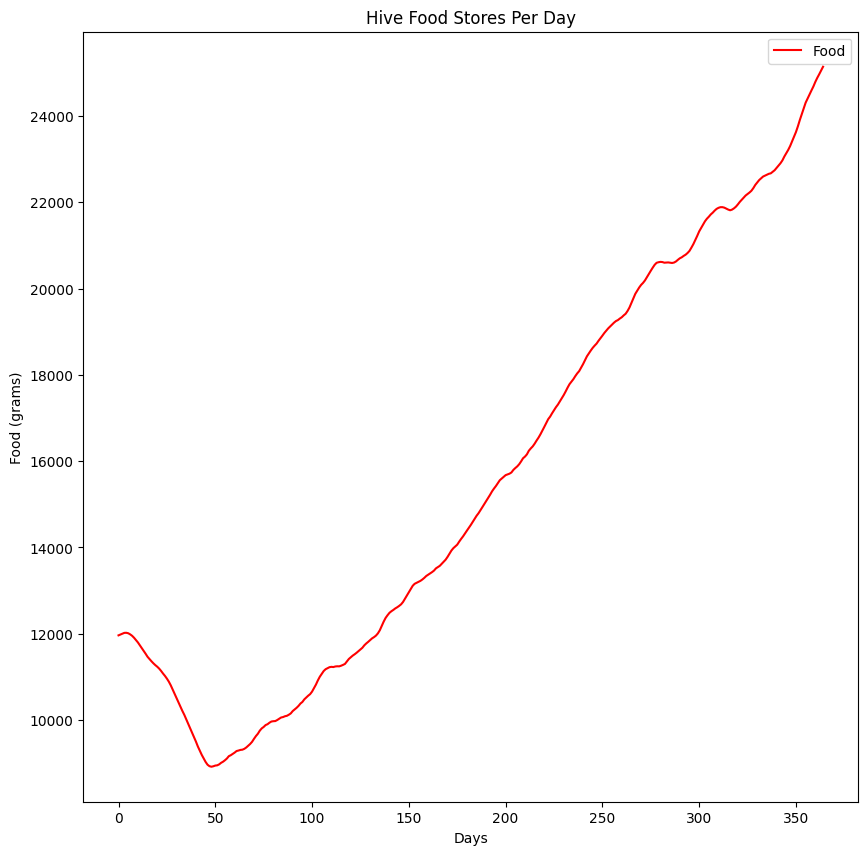

In [191]:
# plot population vs days
#print(Eggs)
#print(Larvae)
#print(Pupae)
#print(Hive_Bees)
#print(Forager_Bees)
plt.figure(figsize=(10,10))
plt.title("Hive Food Stores Per Day", fontsize="large")
plt.xlabel("Days",fontsize='medium')
plt.ylabel("Food (grams)", fontsize='medium')

plt.plot(Food,color='red',label="Food")

plt.legend()
plt.show()

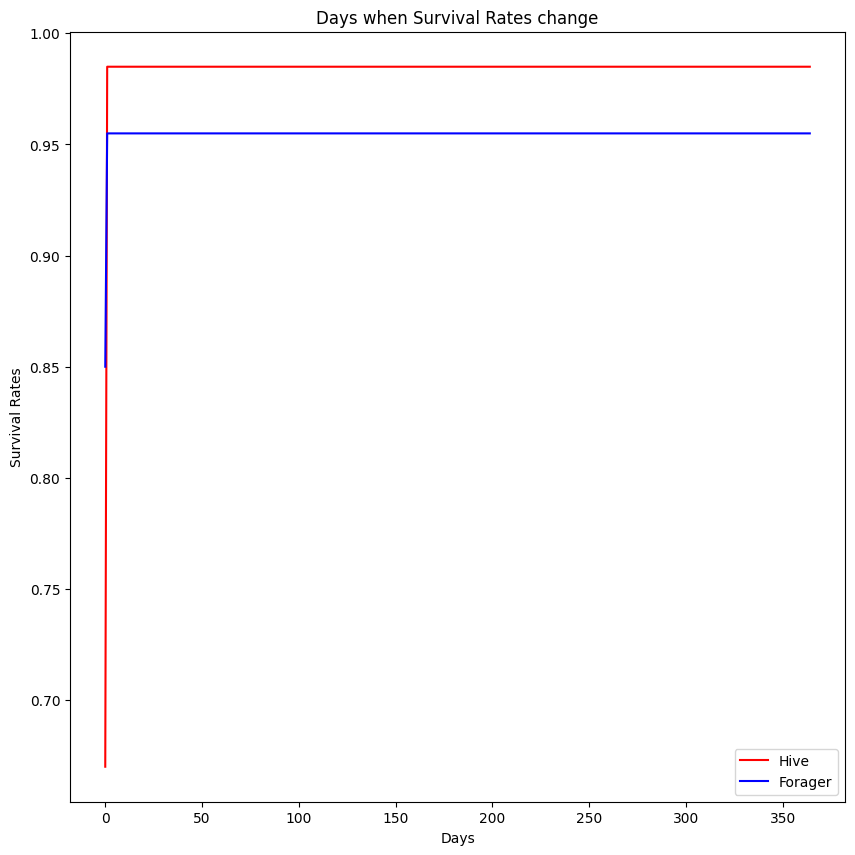

In [192]:
plt.figure(figsize=(10,10))
plt.title("Days when Survival Rates change", fontsize="large")
plt.xlabel("Days",fontsize='medium')
plt.ylabel("Survival Rates", fontsize='medium')

plt.plot(Hive_Survival,color='red',label="Hive")
plt.plot(Forager_Survival, color='blue', label='Forager')
plt.legend()
plt.show()

In [193]:
# SIMULATION WITH SEASONAL EGG LAYING AND FOOD GATHERING, ALWAYS FIXED RATES BUT TRANSITIONING OVER A SET DAY PERIOD
# Season can also affect life spans for bees. Have separate winter 
# survival rates/lifespans
initialize()
summer_spring = True
winter = False
laying = True
Food = np.zeros(days, dtype = float)
initial_food = random.uniform(5000,12000)
print("initial food:", initial_food)
print("initial pop:", initial_pop)
Food[0] = initial_food
Hive_Survival = np.zeros(days, dtype = float)
Hive_Survival[0] = S_hivebee
Forager_Survival = np.zeros(days, dtype = float)
Forager_Survival[0] = S_forager

# starting in July until next July, winter starts in December here, so after 150 days winter then winter is 
# 90 days and the
for i in range(1, days):
    
    if(i > 150 and i < 241):
        winter = True
        summer_spring = False
    else:
        summer_spring = True
        winter = False
        
    # summer and spring they just exist the same as the other simulations
    if(summer_spring):
        # Forager Bees go First
        # Shift Forager Bees over
        Right_Shift(forager_bee_life, S_forager)
        # take hive bees from end of hive bee life and put into forager bee life 0
        forager_bee_life[0] = hive_bee_life[hive_bee_span-1]

        # Hive Bees
        Right_Shift(hive_bee_life, S_hivebee)
        # take pupae transitioning to hive bee
        hive_bee_life[0] = pupae_life[days_as_pupae-1]

        # Pupae
        Right_Shift(pupae_life, S_pupae)
        # take larvae
        pupae_life[0] = larvae_life[days_as_larvae-1]

        # Larvae
        Right_Shift(larvae_life, S_larvae)
        # take eggs
        larvae_life[0] = egg_life[days_in_egg-1]

        # Eggs
        Right_Shift(egg_life, S_egg)
        # queen lays eggs into egg_life[0]
        if(laying):
            egg_life[0] = random.uniform(1000,2000)
        else:
            egg_life[0] = 0
        
        needed = Larvae[i]*C_larvae - Hive_Bees[i]*C_hive - Forager_Bees[i]*C_forager
        if(Food[i-1] > needed):
            Food[i] = Food[i-1] - Larvae[i]*C_larvae - Hive_Bees[i]*C_hive - Forager_Bees[i]*C_forager
            Food[i] += food_per_day*Forager_Bees[i]
            # Hive bee survival rate
            S_hivebee = 0.985
            # Forager bee survival rate
            S_forager = 0.955
        else:
            Cannibalism(i)
            # Hive bee survival rate
            S_hivebee = 0.80
            # Forager bee survival rate
            S_forager = 0.85
            forager_bee_life[0] += hive_bee_life[hive_bee_span-1]
            forager_bee_life[0] += hive_bee_life[hive_bee_span-2]
            hive_bee_life[hive_bee_span-1] = 0
            hive_bee_life[hive_bee_span-2] = 0
            
            Hive_Bees[i] = sum(hive_bee_life) 
            Forager_Bees[i] = sum(forager_bee_life)
            
            food_today = 0.
            for j in range(0, int(Forager_Bees[i])):
                food_today += random.uniform(0.,0.1)
                
            Food[i] += food_today
            
    # during the winter the hive bees stay alive, the foragers all die 
    # nobody gathers food and no eggs are laid, the hiveBees live but die at very slow rate
    elif(winter):
        # foragers go
        Right_Shift(forager_bee_life, S_forager)
        forager_bee_life[0] = 0
        
        # Hive bees only get the pupae
        hive_bee_life[0] += pupae_life[days_as_pupae-1]
        # Pupae
        Right_Shift(pupae_life, S_pupae)
        # take larvae
        pupae_life[0] = larvae_life[days_as_larvae-1]

        # Larvae
        Right_Shift(larvae_life, S_larvae)
        # take eggs
        larvae_life[0] = egg_life[days_in_egg-1]

        # Eggs
        Right_Shift(egg_life, S_egg)
        egg_life[0] = 0.
        # no eggs are laid in the winter
        
        if(Food[i-1] > needed):
            Food[i] = Food[i-1] - Larvae[i]*C_larvae - Hive_Bees[i]*C_hive - Forager_Bees[i]*C_forager
            # Hive bee survival rate
            S_hivebee = 0.99
        else:
            # Hive bee survival rate
            S_hivebee = 0.95
            Food[i] = 0
        hive_bee_life = hive_bee_life*S_hivebee
        
    # Count the population for each cycle on day i
    Forager_Bees[i] = sum(forager_bee_life)
    #print(Forager_Bees[i], i)
    Hive_Bees[i] = sum(hive_bee_life)
    Pupae[i] = sum(pupae_life)
    Larvae[i] = sum(larvae_life)
    Eggs[i] = sum(egg_life)
    
    Total_Bees[i] = Forager_Bees[i] + Hive_Bees[i] + Pupae[i] + Larvae[i] + Eggs[i]
    Total_Bees[i] = math.floor(Total_Bees[i])
        
         
    Hive_Survival[i] = S_hivebee
    Forager_Survival[i] = S_forager
    if(Forager_Bees[i] == 0. and Hive_Bees[i] == 0. and Pupae[i] == 0. and Larvae[i] == 0.):
        print("DEAD")
        Food[i] = Food[i-1]
        laying = False
print(Forager_Bees)

initial food: 5352.172278125601
initial pop: 4900.0
[ 980.          971.71666667  965.27433333  960.47788375  957.1467271
  955.11387545  954.22507489  954.33798762  955.32142184  957.05460715
  959.42651256  962.33520509  965.68724636  969.39712534  973.386725
  958.78592412  944.40413526  930.23807323  916.28450213  902.5402346
  889.00213108  875.66709912  851.16663807  827.5451294   804.76637377
  782.79575051  761.60014734  741.14789324  721.40869428  702.35357243
  683.95480702  666.18587888  649.02141693  632.43714723  624.88253806
  613.18313804  603.90426492  591.26073264  575.7518059   554.19596786
  531.91833354  509.07435174 1149.14215921 1603.26997922 2151.95432143
 2702.29271748 3178.97942304 3419.64010857 3732.74439715 4088.66460601
 4578.28523965 5092.33654598 5447.24660001 5699.76339862 6038.65132639
 6502.02647745 6407.44748197 6406.79479162 6250.30668566 6049.4993497
 5875.69976683 6117.99157188 6121.36997383 6038.28392425 5995.16570868
 6052.35333149 5998.8693301  6

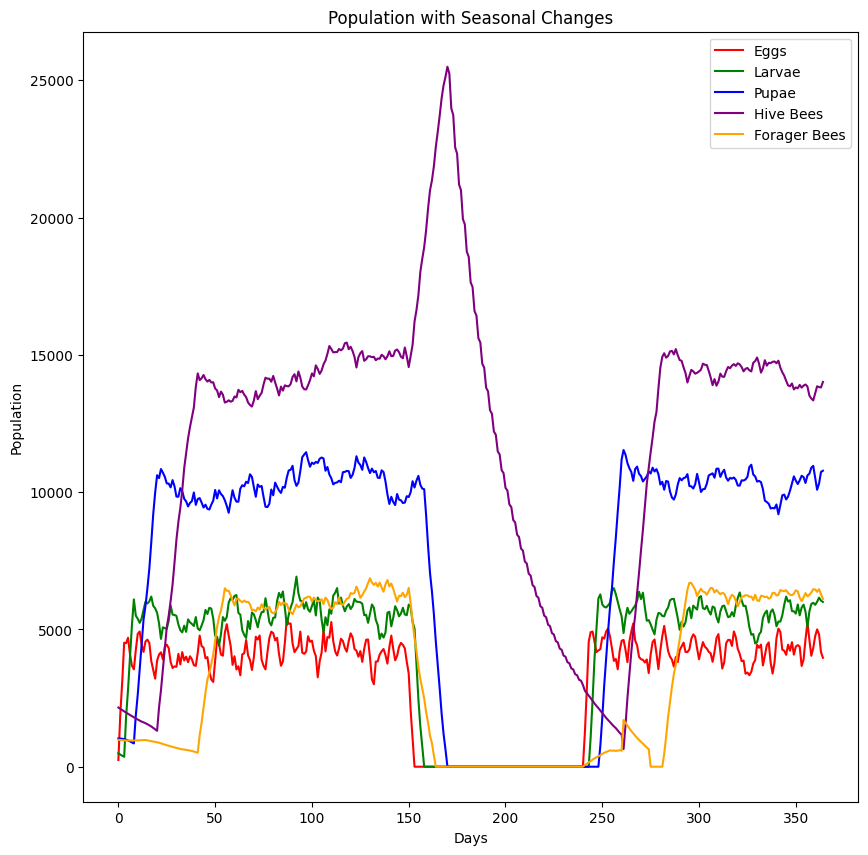

In [197]:
# plot population vs days
#print(Eggs)
#print(Larvae)
#print(Pupae)
#print(Hive_Bees)
#print(Forager_Bees)
plt.figure(figsize=(10,10))
plt.title("Population with Seasonal Changes", fontsize="large")
plt.xlabel("Days",fontsize='medium')
plt.ylabel("Population", fontsize='medium')

plt.plot(Eggs,color='red',label="Eggs")
plt.plot(Larvae,color='green',label='Larvae')
plt.plot(Pupae,color='blue',label='Pupae')
plt.plot(Hive_Bees,color='purple',label='Hive Bees')
plt.plot(Forager_Bees,color='orange',label='Forager Bees')
#plt.plot(Total_Bees, color='black', label='Total Bees')
plt.legend()
plt.show()

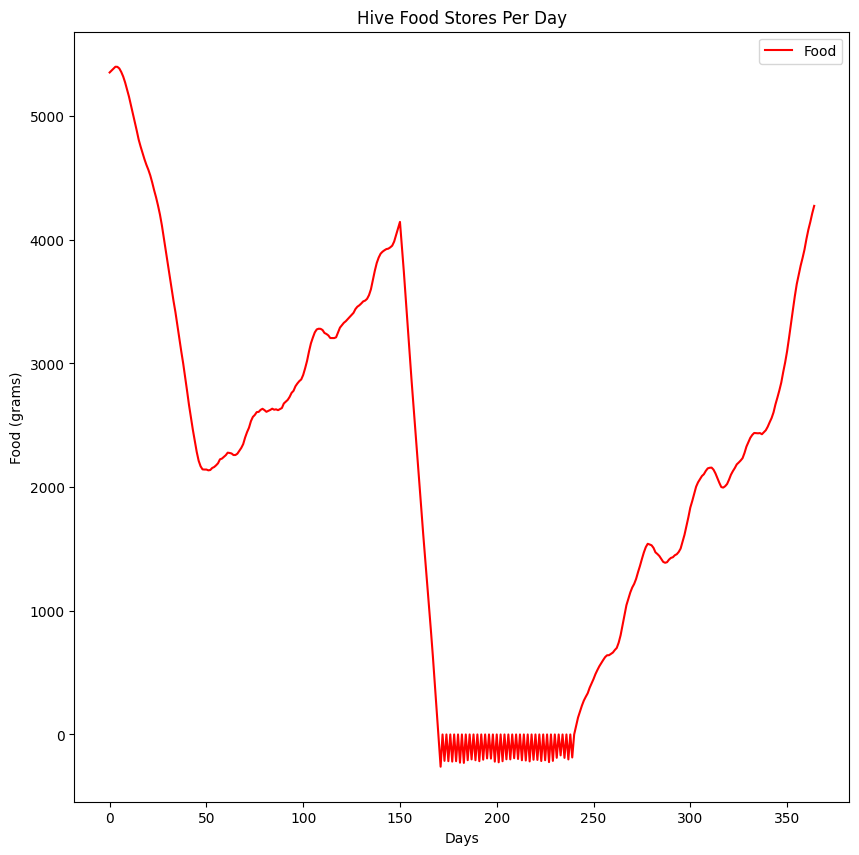

In [195]:
# plot population vs days
#print(Eggs)
#print(Larvae)
#print(Pupae)
#print(Hive_Bees)
#print(Forager_Bees)
plt.figure(figsize=(10,10))
plt.title("Hive Food Stores Per Day", fontsize="large")
plt.xlabel("Days",fontsize='medium')
plt.ylabel("Food (grams)", fontsize='medium')

plt.plot(Food,color='red',label="Food")

plt.legend()
plt.show()

In [196]:
# Split hive bees into nurse and processing - more closely show 
# the population including effects on maybe cannibalizing during seasonal drops